In [1]:
%%capture
%run full_data.ipynb
%run factors.ipynb

In [2]:
import sys 
sys.path.append('..')
import portfolios as p

In [3]:
assigned_data_5 = pd.read_csv('assigned_data_5_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_10 = pd.read_csv('assigned_data_10_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_20 = pd.read_csv('assigned_data_20_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_50 = pd.read_csv('assigned_data_50_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')

In [4]:
assigned_data_5['PORT_MEAN'] = 1
mean_ret = p.compute_strategy_returns(assigned_data_5,'PORT_MEAN',1)

In [5]:
rets_5 = p.portfolios_returns_mean_table(assigned_data_5,'LRET_1',5)
rets_10 = p.portfolios_returns_mean_table(assigned_data_10,'LRET_1',10)
rets_20 = p.portfolios_returns_mean_table(assigned_data_20,'LRET_1',20)
rets_50 = p.portfolios_returns_mean_table(assigned_data_50,'LRET_1',50)

../portfolios.py:176: RuntimeWarning: Mean of empty slice.
  returns[i] = p_data[ret].values.mean()
/home/jaakko/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
rets_5_p = rets_5[10:].sort_index()
rets_10_p = rets_10[10:].sort_index()
rets_20_p = rets_20[10:].sort_index()
rets_50_p= rets_50[10:].sort_index()
mean_ret_p = mean_ret[10:].sort_index()

In [7]:
table_ports = pd.DataFrame()
table_ports['50-Q Losers'] = rets_50_p[1].values
table_ports['20-Q Losers'] = rets_20_p[1].values
table_ports['10-Q Losers'] = rets_10_p[1].values
table_ports['5-Q Losers'] = rets_5_p[1].values
table_ports['50-Q Winners'] = rets_50_p[50].values
table_ports['20-Q Winners'] = rets_20_p[20].values
table_ports['10-Q Winners'] = rets_10_p[10].values
table_ports['5-Q Winners'] = rets_5_p[5].values
table_ports['50-Q Long-short'] = rets_50_p[1].values - rets_50_p[47].values
table_ports['20-Q Long-short'] = rets_20_p[1].values - rets_20_p[19].values
table_ports.index = rets_5_p.index

In [8]:
na_factors_rel = na_factors.loc[table_ports.index]

In [9]:
dev_factors_rel = dev_factors.loc[table_ports.index]

In [10]:
table_ports_excess = table_ports.apply(lambda port: port-na_factors_rel['RF'])

# Market risk table

In [11]:
from metrics import market_risk_table, alpha_table, metrics_table

In [12]:
market_risk_table(table_ports_excess,na_factors_rel)

,alpha %,alpha t-stat,beta,beta t-stat,R^2
50-Q Losers,2.00,3.18 (***),2.14,14.88 (***),0.47
20-Q Losers,1.33,2.63 (***),1.97,17.03 (***),0.54
10-Q Losers,0.90,2.11 (**),1.80,18.46 (***),0.58
5-Q Losers,0.67,2.0 (**),1.58,20.59 (***),0.63
50-Q Winners,0.53,1.14,1.45,13.57 (***),0.42
20-Q Winners,0.43,1.13,1.38,15.72 (***),0.50
10-Q Winners,0.24,0.74,1.28,17.31 (***),0.55
5-Q Winners,0.20,0.79,1.17,20.35 (***),0.62
50-Q Long-short,1.81,2.93 (***),0.92,6.53 (***),0.15
20-Q Long-short,1.14,2.3 (**),0.79,6.95 (***),0.16


In [13]:
print(market_risk_table(table_ports_excess,na_factors_rel).to_latex())

\begin{tabular}{lrlrlr}
\toprule
{} &  alpha \% & alpha t-stat &  beta &  beta t-stat &   R\textasciicircum 2 \\
\midrule
50-Q Losers     &     2.00 &   3.18 (***) &  2.14 &  14.88 (***) &  0.47 \\
20-Q Losers     &     1.33 &   2.63 (***) &  1.97 &  17.03 (***) &  0.54 \\
10-Q Losers     &     0.90 &    2.11 (**) &  1.80 &  18.46 (***) &  0.58 \\
5-Q Losers      &     0.67 &     2.0 (**) &  1.58 &  20.59 (***) &  0.63 \\
50-Q Winners    &     0.53 &         1.14 &  1.45 &  13.57 (***) &  0.42 \\
20-Q Winners    &     0.43 &         1.13 &  1.38 &  15.72 (***) &  0.50 \\
10-Q Winners    &     0.24 &         0.74 &  1.28 &  17.31 (***) &  0.55 \\
5-Q Winners     &     0.20 &         0.79 &  1.17 &  20.35 (***) &  0.62 \\
50-Q Long-short &     1.81 &   2.93 (***) &  0.92 &   6.53 (***) &  0.15 \\
20-Q Long-short &     1.14 &     2.3 (**) &  0.79 &   6.95 (***) &  0.16 \\
\bottomrule
\end{tabular}



Sample 2006-2019

In [14]:
table_ports_excess_06 = table_ports_excess.loc[table_ports_excess.index >= 200601]
na_factors_rel_06 = na_factors_rel.loc[table_ports_excess_06.index]

In [15]:
market_risk_table(table_ports_excess_06,na_factors_rel_06)

,alpha %,alpha t-stat,beta,beta t-stat,R^2
50-Q Losers,0.86,1.52,1.90,14.51 (***),0.56
20-Q Losers,0.43,0.96,1.77,17.33 (***),0.64
10-Q Losers,0.11,0.32,1.65,20.9 (***),0.72
5-Q Losers,0.05,0.19,1.50,25.12 (***),0.79
50-Q Winners,-0.00,-0.0,1.32,13.91 (***),0.54
20-Q Winners,-0.06,-0.2,1.29,18.0 (***),0.66
10-Q Winners,-0.18,-0.71,1.22,20.46 (***),0.72
5-Q Winners,-0.15,-0.71,1.15,23.51 (***),0.77
50-Q Long-short,1.09,2.06 (**),0.71,5.83 (***),0.17
20-Q Long-short,0.63,1.62,0.62,6.87 (***),0.22


In [16]:
print(market_risk_table(table_ports_excess_06,na_factors_rel_06).to_latex())

\begin{tabular}{lrlrlr}
\toprule
{} &  alpha \% & alpha t-stat &  beta &  beta t-stat &   R\textasciicircum 2 \\
\midrule
50-Q Losers     &     0.86 &         1.52 &  1.90 &  14.51 (***) &  0.56 \\
20-Q Losers     &     0.43 &         0.96 &  1.77 &  17.33 (***) &  0.64 \\
10-Q Losers     &     0.11 &         0.32 &  1.65 &   20.9 (***) &  0.72 \\
5-Q Losers      &     0.05 &         0.19 &  1.50 &  25.12 (***) &  0.79 \\
50-Q Winners    &    -0.00 &         -0.0 &  1.32 &  13.91 (***) &  0.54 \\
20-Q Winners    &    -0.06 &         -0.2 &  1.29 &   18.0 (***) &  0.66 \\
10-Q Winners    &    -0.18 &        -0.71 &  1.22 &  20.46 (***) &  0.72 \\
5-Q Winners     &    -0.15 &        -0.71 &  1.15 &  23.51 (***) &  0.77 \\
50-Q Long-short &     1.09 &    2.06 (**) &  0.71 &   5.83 (***) &  0.17 \\
20-Q Long-short &     0.63 &         1.62 &  0.62 &   6.87 (***) &  0.22 \\
\bottomrule
\end{tabular}



In [17]:
table_ports_excess_13 = table_ports_excess.loc[table_ports_excess.index >= 201301]
na_factors_rel_13 = na_factors_rel.loc[table_ports_excess_13.index]

In [18]:
market_risk_table(table_ports_excess_13,na_factors_rel_13)

,alpha %,alpha t-stat,beta,beta t-stat,R^2
50-Q Losers,-0.81,-1.15,1.72,8.54 (***),0.47
20-Q Losers,-0.50,-0.92,1.63,10.36 (***),0.57
10-Q Losers,-0.54,-1.25,1.55,12.52 (***),0.66
5-Q Losers,-0.31,-0.93,1.43,14.67 (***),0.72
50-Q Winners,-0.18,-0.28,1.25,6.8 (***),0.36
20-Q Winners,-0.32,-0.7,1.28,9.78 (***),0.54
10-Q Winners,-0.45,-1.24,1.21,11.53 (***),0.62
5-Q Winners,-0.38,-1.32,1.14,13.57 (***),0.69
50-Q Long-short,-0.39,-0.57,0.56,2.91 (***),0.09
20-Q Long-short,0.02,0.05,0.50,3.52 (***),0.13


In [19]:
print(market_risk_table(table_ports_excess_13,na_factors_rel_13).to_latex())

\begin{tabular}{lrlrlr}
\toprule
{} &  alpha \% & alpha t-stat &  beta &  beta t-stat &   R\textasciicircum 2 \\
\midrule
50-Q Losers     &    -0.81 &        -1.15 &  1.72 &   8.54 (***) &  0.47 \\
20-Q Losers     &    -0.50 &        -0.92 &  1.63 &  10.36 (***) &  0.57 \\
10-Q Losers     &    -0.54 &        -1.25 &  1.55 &  12.52 (***) &  0.66 \\
5-Q Losers      &    -0.31 &        -0.93 &  1.43 &  14.67 (***) &  0.72 \\
50-Q Winners    &    -0.18 &        -0.28 &  1.25 &    6.8 (***) &  0.36 \\
20-Q Winners    &    -0.32 &         -0.7 &  1.28 &   9.78 (***) &  0.54 \\
10-Q Winners    &    -0.45 &        -1.24 &  1.21 &  11.53 (***) &  0.62 \\
5-Q Winners     &    -0.38 &        -1.32 &  1.14 &  13.57 (***) &  0.69 \\
50-Q Long-short &    -0.39 &        -0.57 &  0.56 &   2.91 (***) &  0.09 \\
20-Q Long-short &     0.02 &         0.05 &  0.50 &   3.52 (***) &  0.13 \\
\bottomrule
\end{tabular}



# Alpha tables

## North American factors

Full backtesting sample

In [20]:
alpha_table(table_ports_excess,na_factors_rel)

,CAPM alpha %,FF-3 alpha %,CAR-4 alpha %,FF-5 alpha %
50-Q Losers,2.0 (***),1.9 (***),2.44 (***),2.75 (***)
20-Q Losers,1.33 (***),1.24 (***),1.67 (***),1.92 (***)
10-Q Losers,0.9 (**),0.8 (**),1.15 (***),1.37 (***)
5-Q Losers,0.67 (**),0.57 (**),0.83 (***),0.98 (***)
50-Q Winners,0.53,0.41,0.44,0.62 (*)
20-Q Winners,0.43,0.31,0.31,0.46 (*)
10-Q Winners,0.24,0.12,0.12,0.27
5-Q Winners,0.2,0.08,0.1,0.18
50-Q Long-short,1.81 (***),1.82 (***),2.34 (***),2.51 (***)
20-Q Long-short,1.14 (**),1.16 (**),1.59 (***),1.7 (***)


In [21]:
print(alpha_table(table_ports_excess,na_factors_rel).to_latex())

\begin{tabular}{lllll}
\toprule
{} & CAPM alpha \% & FF-3 alpha \% & CAR-4 alpha \% & FF-5 alpha \% \\
\midrule
50-Q Losers     &    2.0 (***) &    1.9 (***) &    2.44 (***) &   2.75 (***) \\
20-Q Losers     &   1.33 (***) &   1.24 (***) &    1.67 (***) &   1.92 (***) \\
10-Q Losers     &     0.9 (**) &     0.8 (**) &    1.15 (***) &   1.37 (***) \\
5-Q Losers      &    0.67 (**) &    0.57 (**) &    0.83 (***) &   0.98 (***) \\
50-Q Winners    &         0.53 &         0.41 &          0.44 &     0.62 (*) \\
20-Q Winners    &         0.43 &         0.31 &          0.31 &     0.46 (*) \\
10-Q Winners    &         0.24 &         0.12 &          0.12 &         0.27 \\
5-Q Winners     &          0.2 &         0.08 &           0.1 &         0.18 \\
50-Q Long-short &   1.81 (***) &   1.82 (***) &    2.34 (***) &   2.51 (***) \\
20-Q Long-short &    1.14 (**) &    1.16 (**) &    1.59 (***) &    1.7 (***) \\
\bottomrule
\end{tabular}



In [22]:
alpha_table(table_ports_excess_06,na_factors_rel_06)

,CAPM alpha %,FF-3 alpha %,CAR-4 alpha %,FF-5 alpha %
50-Q Losers,0.86,1.29 (**),1.36 (***),1.78 (***)
20-Q Losers,0.43,0.78 (**),0.83 (***),1.16 (***)
10-Q Losers,0.11,0.42,0.46 (**),0.7 (***)
5-Q Losers,0.05,0.3 (*),0.33 (**),0.51 (***)
50-Q Winners,-0.0,0.23,0.23,0.27
20-Q Winners,-0.06,0.13,0.14,0.14
10-Q Winners,-0.18,-0.0,0.01,0.02
5-Q Winners,-0.15,0.02,0.03,0.04
50-Q Long-short,1.09 (**),1.34 (***),1.4 (***),1.78 (***)
20-Q Long-short,0.63,0.81 (**),0.86 (**),1.17 (***)


In [23]:
print(alpha_table(table_ports_excess_06,na_factors_rel_06).to_latex())

\begin{tabular}{lllll}
\toprule
{} & CAPM alpha \% & FF-3 alpha \% & CAR-4 alpha \% & FF-5 alpha \% \\
\midrule
50-Q Losers     &         0.86 &    1.29 (**) &    1.36 (***) &   1.78 (***) \\
20-Q Losers     &         0.43 &    0.78 (**) &    0.83 (***) &   1.16 (***) \\
10-Q Losers     &         0.11 &         0.42 &     0.46 (**) &    0.7 (***) \\
5-Q Losers      &         0.05 &      0.3 (*) &     0.33 (**) &   0.51 (***) \\
50-Q Winners    &         -0.0 &         0.23 &          0.23 &         0.27 \\
20-Q Winners    &        -0.06 &         0.13 &          0.14 &         0.14 \\
10-Q Winners    &        -0.18 &         -0.0 &          0.01 &         0.02 \\
5-Q Winners     &        -0.15 &         0.02 &          0.03 &         0.04 \\
50-Q Long-short &    1.09 (**) &   1.34 (***) &     1.4 (***) &   1.78 (***) \\
20-Q Long-short &         0.63 &    0.81 (**) &     0.86 (**) &   1.17 (***) \\
\bottomrule
\end{tabular}



Sample 2013-2019

In [24]:
alpha_table(table_ports_excess_13,na_factors_rel_13)

,CAPM alpha %,FF-3 alpha %,CAR-4 alpha %,FF-5 alpha %
50-Q Losers,-0.81,0.07,0.13,0.09
20-Q Losers,-0.5,0.24,0.28,0.26
10-Q Losers,-0.54,0.12,0.17,0.14
5-Q Losers,-0.31,0.25,0.29,0.26
50-Q Winners,-0.18,0.5,0.53,0.46
20-Q Winners,-0.32,0.19,0.18,0.17
10-Q Winners,-0.45,0.01,-0.02,-0.01
5-Q Winners,-0.38,0.04,0.0,0.02
50-Q Long-short,-0.39,0.09,0.2,0.12
20-Q Long-short,0.02,0.36,0.44,0.39


In [25]:
print(alpha_table(table_ports_excess_13,na_factors_rel_13).to_latex())

\begin{tabular}{lllll}
\toprule
{} & CAPM alpha \% & FF-3 alpha \% & CAR-4 alpha \% & FF-5 alpha \% \\
\midrule
50-Q Losers     &        -0.81 &         0.07 &          0.13 &         0.09 \\
20-Q Losers     &         -0.5 &         0.24 &          0.28 &         0.26 \\
10-Q Losers     &        -0.54 &         0.12 &          0.17 &         0.14 \\
5-Q Losers      &        -0.31 &         0.25 &          0.29 &         0.26 \\
50-Q Winners    &        -0.18 &          0.5 &          0.53 &         0.46 \\
20-Q Winners    &        -0.32 &         0.19 &          0.18 &         0.17 \\
10-Q Winners    &        -0.45 &         0.01 &         -0.02 &        -0.01 \\
5-Q Winners     &        -0.38 &         0.04 &           0.0 &         0.02 \\
50-Q Long-short &        -0.39 &         0.09 &           0.2 &         0.12 \\
20-Q Long-short &         0.02 &         0.36 &          0.44 &         0.39 \\
\bottomrule
\end{tabular}



## Correlations

In [26]:
market_ps = assigned_data_5[['date','ewretd','vwretd']].set_index('date').drop_duplicates()[10:].sort_index()

In [28]:
corr_data = table_ports
corr_data['Universe ew'] = mean_ret_p['RET']
corr_data['ewretd'] = market_ps['ewretd']
corr_data['vwretd'] = market_ps['vwretd']

In [29]:
corr_data.corr().round(2)

,50-Q Losers,20-Q Losers,10-Q Losers,5-Q Losers,50-Q Winners,20-Q Winners,10-Q Winners,5-Q Winners,50-Q Long-short,20-Q Long-short,Universe ew,ewretd,vwretd
50-Q Losers,1.00,0.99,0.97,0.95,0.61,0.63,0.65,0.68,0.86,0.83,0.85,0.87,0.70
20-Q Losers,0.99,1.00,0.99,0.98,0.64,0.66,0.68,0.71,0.82,0.82,0.89,0.91,0.74
10-Q Losers,0.97,0.99,1.00,0.99,0.64,0.66,0.69,0.72,0.79,0.80,0.92,0.93,0.77
5-Q Losers,0.95,0.98,0.99,1.00,0.65,0.67,0.70,0.74,0.75,0.77,0.94,0.95,0.80
50-Q Winners,0.61,0.64,0.64,0.65,1.00,0.97,0.95,0.92,0.20,0.16,0.77,0.77,0.67
20-Q Winners,0.63,0.66,0.66,0.67,0.97,1.00,0.99,0.97,0.18,0.14,0.82,0.81,0.72
10-Q Winners,0.65,0.68,0.69,0.70,0.95,0.99,1.00,0.99,0.19,0.15,0.85,0.84,0.75
5-Q Winners,0.68,0.71,0.72,0.74,0.92,0.97,0.99,1.00,0.23,0.20,0.89,0.87,0.80
50-Q Long-short,0.86,0.82,0.79,0.75,0.20,0.18,0.19,0.23,1.00,0.96,0.52,0.56,0.39
20-Q Long-short,0.83,0.82,0.80,0.77,0.16,0.14,0.15,0.20,0.96,1.00,0.54,0.57,0.41


In [30]:
print(corr_data.corr().round(2).to_latex())

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  50-Q Losers &  20-Q Losers &  10-Q Losers &  5-Q Losers &  50-Q Winners &  20-Q Winners &  10-Q Winners &  5-Q Winners &  50-Q Long-short &  20-Q Long-short &  Universe ew &  ewretd &  vwretd \\
\midrule
50-Q Losers     &         1.00 &         0.99 &         0.97 &        0.95 &          0.61 &          0.63 &          0.65 &         0.68 &             0.86 &             0.83 &         0.85 &    0.87 &    0.70 \\
20-Q Losers     &         0.99 &         1.00 &         0.99 &        0.98 &          0.64 &          0.66 &          0.68 &         0.71 &             0.82 &             0.82 &         0.89 &    0.91 &    0.74 \\
10-Q Losers     &         0.97 &         0.99 &         1.00 &        0.99 &          0.64 &          0.66 &          0.69 &         0.72 &             0.79 &             0.80 &         0.92 &    0.93 &    0.77 \\
5-Q Losers      &         0.95 &         0.98 &         0.99 &        1.00 &          0.65 &          0.67 

## Metrics table

In [31]:
from metrics import metrics_table

In [32]:
metrics_table(table_ports,na_factors_rel)

index,Volatility,Semi-deviation,Sharpe ratio,MAR ratio,Sortino ratio,Max drawdown,min,Skewness,Kurtosis
50-Q Losers,13.58,613.0,0.231,6.17,0.536,-59.79,-27.29,1.88,9.90
20-Q Losers,11.68,599.0,0.203,4.71,0.421,-59.57,-26.40,1.55,8.28
10-Q Losers,10.27,595.0,0.180,3.71,0.336,-59.42,-26.45,1.30,8.20
5-Q Losers,8.67,542.0,0.174,3.25,0.306,-60.02,-25.12,0.94,6.83
50-Q Winners,9.70,624.0,0.135,5.04,0.233,-80.23,-33.47,0.56,3.73
20-Q Winners,8.50,538.0,0.137,3.41,0.244,-71.64,-24.50,0.90,5.86
10-Q Winners,7.54,476.0,0.122,2.41,0.224,-67.13,-22.52,0.82,5.28
5-Q Winners,6.44,413.0,0.128,1.78,0.234,-57.03,-19.00,0.46,3.31
50-Q Long-short,10.49,441.0,0.219,3.77,0.553,-47.60,-24.85,3.05,21.86
20-Q Long-short,8.51,393.0,0.183,2.34,0.433,-40.64,-20.69,3.17,24.64


In [33]:
print(metrics_table(table_ports,na_factors_rel).to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
index &  Volatility &  Semi-deviation &  Sharpe ratio &  MAR ratio &  Sortino ratio &  Max drawdown &    min &  Skewness &  Kurtosis \\
\midrule
50-Q Losers     &       13.58 &           613.0 &         0.231 &       6.17 &          0.536 &        -59.79 & -27.29 &      1.88 &      9.90 \\
20-Q Losers     &       11.68 &           599.0 &         0.203 &       4.71 &          0.421 &        -59.57 & -26.40 &      1.55 &      8.28 \\
10-Q Losers     &       10.27 &           595.0 &         0.180 &       3.71 &          0.336 &        -59.42 & -26.45 &      1.30 &      8.20 \\
5-Q Losers      &        8.67 &           542.0 &         0.174 &       3.25 &          0.306 &        -60.02 & -25.12 &      0.94 &      6.83 \\
50-Q Winners    &        9.70 &           624.0 &         0.135 &       5.04 &          0.233 &        -80.23 & -33.47 &      0.56 &      3.73 \\
20-Q Winners    &        8.50 &           538.0 &         0.137 &       3.41 &          

## Drawndown underwater plots

Q-50 Losers

In [34]:
q50_losers = table_ports['50-Q Losers']
q50_losers_cum = (1 + q50_losers).cumprod()

In [35]:
q50_losers_dd = q50_losers_cum / q50_losers_cum.cummax() - 1
q50_losers_max_dd = q50_losers_dd.cummin()

In [36]:
q50_losers_dd.index = q50_losers_dd.index.astype(str)
q50_losers_max_dd.index = q50_losers_max_dd.index.astype(str)

In [38]:
import matplotlib.pyplot as plt

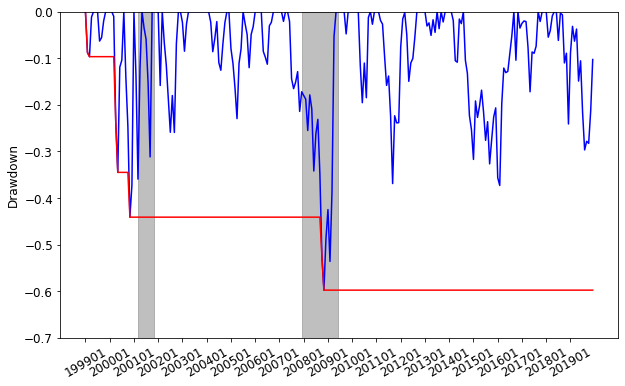

In [39]:
plt.figure(figsize=(10,6))
plt.plot(q50_losers_dd,'blue')
plt.plot(q50_losers_max_dd,'red')

plt.xticks(range(0,252,12), q50_losers.index[::12],rotation=30)
plt.tick_params(labelsize=12)
plt.axvspan(26, 34, alpha=0.5, color='grey')
plt.axvspan(107, 125, alpha=0.5, color='grey')
plt.ylim((-0.7,0))
plt.ylabel('Drawdown',fontsize=12)

plt.show()

Q-20 Losers

In [40]:
q20_losers = table_ports['20-Q Losers']
q20_losers_cum = (1 + q20_losers).cumprod()

In [41]:
q20_losers_dd = q20_losers_cum / q20_losers_cum.cummax() - 1
q20_losers_max_dd = q20_losers_dd.cummin()

In [42]:
q20_losers_dd.index = q20_losers_dd.index.astype(str)
q20_losers_max_dd.index = q20_losers_max_dd.index.astype(str)

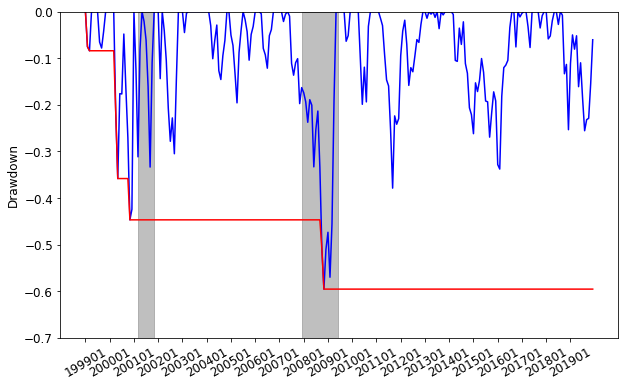

In [43]:
plt.figure(figsize=(10,6))
plt.plot(q20_losers_dd,'blue')
plt.plot(q20_losers_max_dd,'red')

plt.xticks(range(0,252,12), q50_losers.index[::12],rotation=30)
plt.tick_params(labelsize=12)
plt.axvspan(26, 34, alpha=0.5, color='grey')
plt.axvspan(107, 125, alpha=0.5, color='grey')
plt.ylim((-0.7,0))
plt.ylabel('Drawdown',fontsize=12)

plt.show()

Q-50 Long-short

In [44]:
q50_LS = table_ports['50-Q Long-short']
q50_LS_sum = (1 + q50_LS).cumprod()

In [45]:
q50_LS_dd = q50_LS_sum / q50_LS_sum.cummax() - 1
q50_LS_max_dd = q50_LS_dd.cummin()

In [46]:
q50_LS_dd.index = q20_losers_dd.index.astype(str)
q50_LS_max_dd.index = q20_losers_max_dd.index.astype(str)

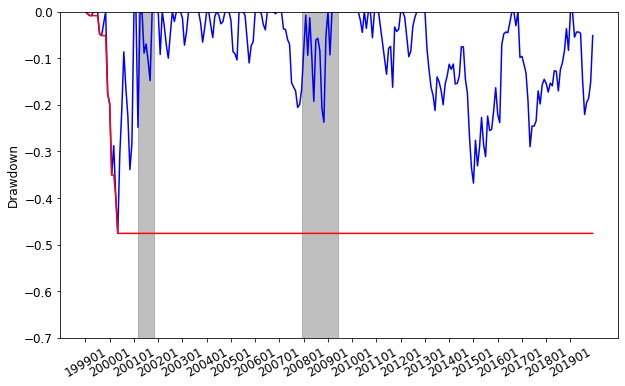

In [47]:
plt.figure(figsize=(10,6))
plt.plot(q50_LS_dd,'blue')
plt.plot(q50_LS_max_dd,'red')

plt.xticks(range(0,252,12), q50_losers.index[::12],rotation=30)
plt.tick_params(labelsize=12)
plt.axvspan(26, 34, alpha=0.5, color='grey')
plt.axvspan(107, 125, alpha=0.5, color='grey')
plt.ylim((-0.7,0))
plt.ylabel('Drawdown',fontsize=12)

plt.show()

20-Q Long-short

In [48]:
q20_LS = table_ports['20-Q Long-short']
q20_LS_sum = (1 + q20_LS).cumprod()

In [49]:
q20_LS_dd = q20_LS_sum / q20_LS_sum.cummax() - 1
q20LS_max_dd = q20_LS_dd.cummin()

In [50]:
q20_LS_dd.index = q20_losers_dd.index.astype(str)
q20LS_max_dd.index = q20_losers_max_dd.index.astype(str)

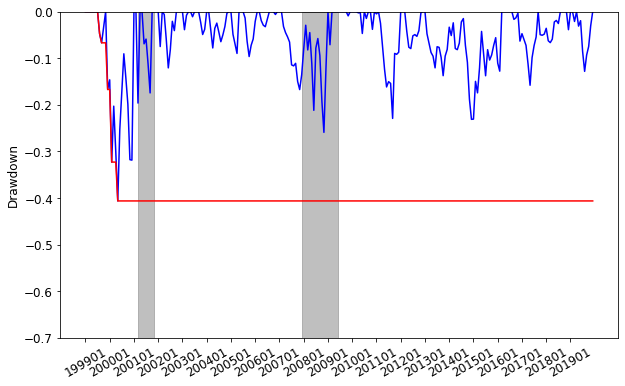

In [51]:
plt.figure(figsize=(10,6))
plt.plot(q20_LS_dd,'blue')
plt.plot(q20LS_max_dd,'red')

plt.xticks(range(0,252,12), q50_losers.index[::12],rotation=30)
plt.tick_params(labelsize=12)
plt.axvspan(26, 34, alpha=0.5, color='grey')
plt.axvspan(107, 125, alpha=0.5, color='grey')
plt.ylim((-0.7,0))
plt.ylabel('Drawdown',fontsize=12)

plt.show()